# 国内債券ETF

iシェアーズ・コア 日本国債 ETF VS NF国内債券

In [20]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import yfinance as yf

from dividends_reinvestment_return import dividends_reinvestment_return

figsize = (1.618*6, 6)

## iシェアーズ・コア 日本国債 ETF

CAGR: -2.036%
Volatility: 4.734%


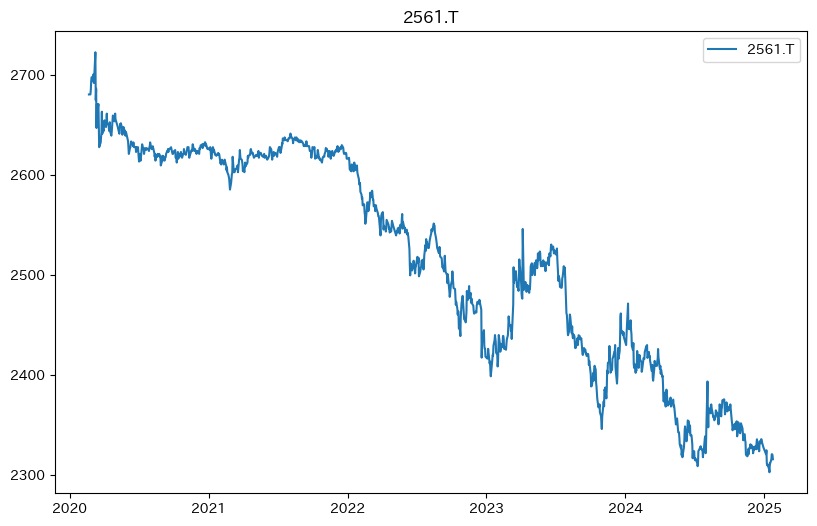

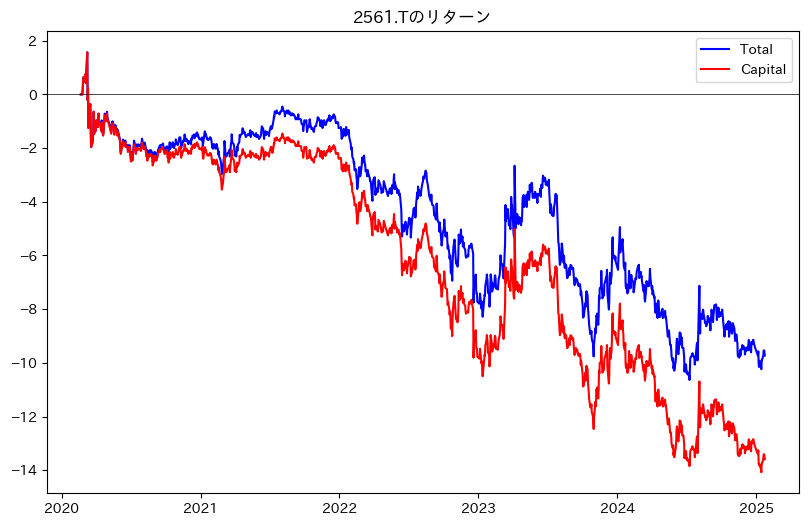

In [64]:
ticker = '2561.T'
yf_ticker = yf.Ticker(ticker)
historical_data = yf_ticker.history(period='max')

def get_close_and_dividends(data):
    df = pl.DataFrame({
        'Date': data.index,
        'Close': data['Close'],
        'Dividends': data['Dividends'],
    })
    return df

df = get_close_and_dividends(historical_data)
df = dividends_reinvestment_return(df, initial_shares=10000)
df = df.with_columns([
    (pl.col('Close') * 10000).log().alias('LogClose'),
])
df = df.with_columns([
    (df['LogClose'] - df['LogClose'][0]).alias('LogCapitalReturn'),
])
df = df.with_columns([
    ((pl.col('LogCapitalReturn').exp() - 1) * 100).alias('CapitalReturn')
])

fig, ax = plt.subplots(figsize=figsize)
ax.plot(df['Date'], df['Close'], label=f'{ticker}')
ax.set_title(f'{ticker}')
ax.legend()

fig, ax = plt.subplots(figsize=figsize)
ax.plot(df['Date'], df['Return'], label='Total', color='blue')
ax.plot(df['Date'], df['CapitalReturn'], label='Capital', color='red')
ax.axhline(0, color='black', linewidth=0.5)
ax.set_title(f'{ticker}のリターン')
ax.legend()

cagr = df['Return'][-1] / len(df) * 252
print(f'CAGR: {cagr:.3f}%')

diff = df.with_columns([(pl.col('LogValue') - pl.col('LogValue').shift(1)).alias('Diff')]).fill_null(0)['Diff'].to_numpy()
std = np.std(diff) * np.sqrt(252)
print(f'Volatility: {std:.3%}')

## NF国内債券

CAGR: -0.574
Volatility: 4.344%


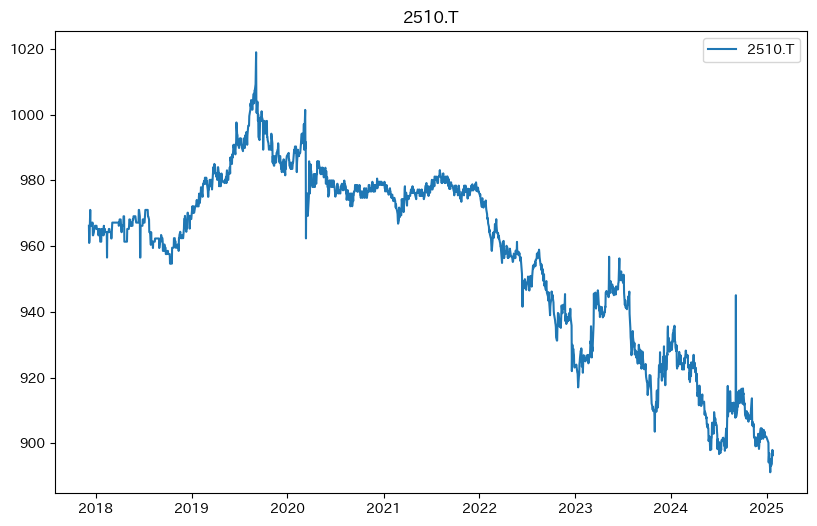

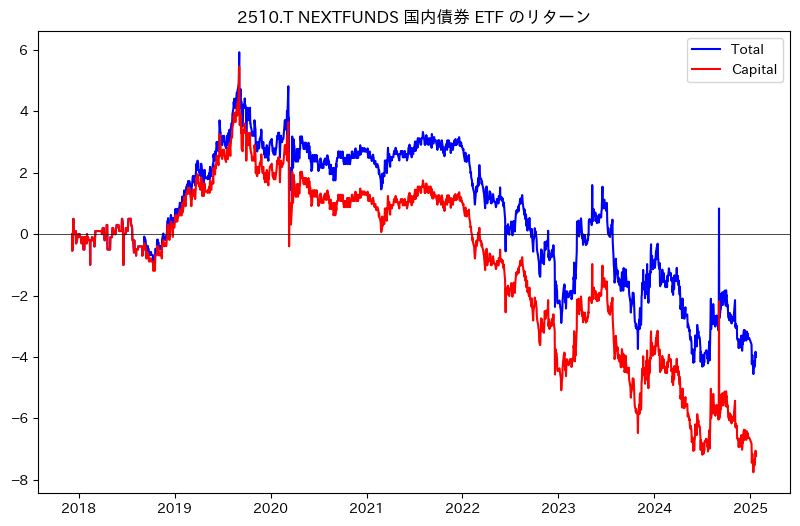

In [57]:
ticker = '2510.T'
yf_ticker = yf.Ticker(ticker)
historical_data = yf_ticker.history(period='max')

def get_close_and_dividends(data):
    df = pl.DataFrame({
        'Date': data.index,
        'Close': data['Close'],
        'Dividends': data['Dividends'],
    })
    return df

df = get_close_and_dividends(historical_data)
df = dividends_reinvestment_return(df, initial_shares=10000)
df = df.with_columns([
    (pl.col('Close') * 10000).log().alias('LogClose'),
])
df = df.with_columns([
    (df['LogClose'] - df['LogClose'][0]).alias('LogCapitalReturn'),
])
df = df.with_columns([
    ((pl.col('LogCapitalReturn').exp() - 1) * 100).alias('CapitalReturn')
])

fig, ax = plt.subplots(figsize=figsize)
ax.plot(df['Date'], df['Close'], label=f'{ticker}')
ax.set_title(f'{ticker}')
ax.legend()

fig, ax = plt.subplots(figsize=figsize)
ax.plot(df['Date'], df['Return'], label='Total', color='blue')
ax.plot(df['Date'], df['CapitalReturn'], label='Capital', color='red')
ax.axhline(0, color='black', linewidth=0.5)
ax.set_title(f'{ticker} NEXTFUNDS 国内債券 ETF のリターン')
ax.legend()

cagr = df['Return'][-1] / len(df) * 252
print(f'CAGR: {cagr:.3f}')

diff = df.with_columns([(pl.col('LogValue') - pl.col('LogValue').shift(1)).alias('Diff')]).fill_null(0)['Diff'].to_numpy()
std = np.std(diff) * np.sqrt(252)
print(f'Volatility: {std:.3%}')

## 比較

[*********************100%***********************]  2 of 2 completed


iShares CAGR: -2.036
NEXT FUNDS CAGR: -1.479


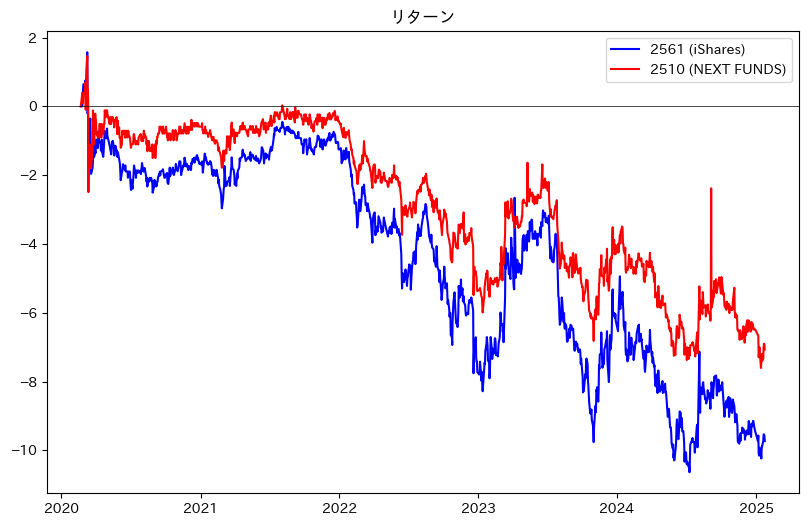

In [59]:
ticker = ['2561.T', '2510.T']
yf_ticker = yf.Tickers(ticker)
historical_data = yf_ticker.history(period='max')
historical_data.dropna(inplace=True)

def get_close_and_dividends(data, ticker):
    df = pl.DataFrame({
        'Date': data.index,
        'Close': data['Close'][f'{ticker}'],
        'Dividends': data['Dividends'][f'{ticker}'],
    })
    return df

df_2561 = get_close_and_dividends(historical_data, '2561.T')
df_2561 = dividends_reinvestment_return(df_2561, initial_shares=10000)

df_2510 = get_close_and_dividends(historical_data, '2510.T')
df_2510 = dividends_reinvestment_return(df_2510, initial_shares=10000)

fig, ax = plt.subplots(figsize=figsize)
ax.plot(df_2561['Date'], df_2561['Return'], label='2561 (iShares)', color='blue')
ax.plot(df_2510['Date'], df_2510['Return'], label='2510 (NEXT FUNDS)', color='red')
ax.axhline(0, color='black', linewidth=0.5)
ax.set_title('リターン')
ax.legend()

cagr_2561 = df_2561['Return'][-1] / len(df_2561) * 252
cagr_2510 = df_2510['Return'][-1] / len(df_2510) * 252
print(f'iShares CAGR: {cagr_2561:.3f}')
print(f'NEXT FUNDS CAGR: {cagr_2510:.3f}')